In [8]:
using Plots
gadfly()
default(leg=false,size=(400,400));
#debugplots();

[Plots.jl] Switched to backend: gadfly


[Plots.jl] Switched to backend: gadfly

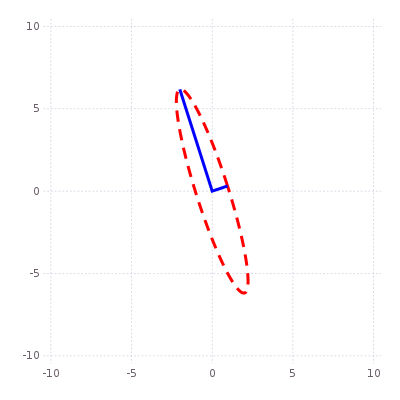


linex = [-2.008610463437158,0.0,0.9510565162951535]
liney = [6.181867355918498,0.0,0.3090169943749474]


In [6]:
using Plots; gadfly()
lim = (-10,10)
ellipse = EllipseRecipe(1, 6.5, 0,0, 0.1π)
plot(ellipse, xlim=lim, ylim=lim, size=(400,400),leg=false)

In [119]:
n = 100
x = randn(n) * 2 + 1
y = randn(n) * 1 + x + 4
scatter(x, y, c=:orange, m=4);

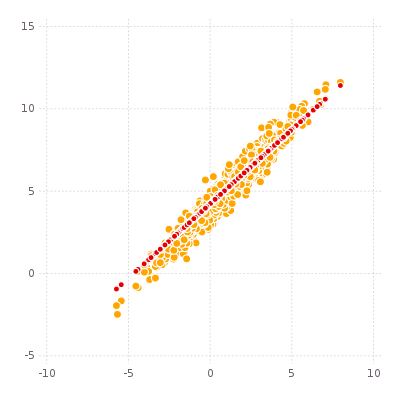

In [91]:
using OnlineStats
matx = reshape(x,n,1)
reg = SGModel(matx, y)
yhat = predict(reg, matx)
scatter!(x,yhat,m=3)

In [120]:
using OnlineStats, MultivariateStats
c = CovarianceMatrix([x y])
p = pca(c)
w,h = 1.96 * sqrt(principalvars(p))
projection(p)

2x2 Array{Float64,2}:
 0.707107  -0.707107
 0.707107   0.707107

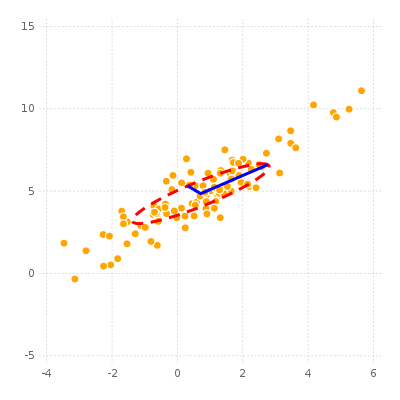

In [121]:

mx, my, c = mean(x), mean(y), cor(x,y)
U, S, V = svd([x y-my])
#w, h = sqrt(S)
#w, h = 1.96 * std([x y] * V, 1)
ep = EllipseRecipe(w, h, mx, my, 2π - 0.25π*c)
plot!(ep)

In [99]:
U,S,V = svd([x y])
std([x y] * V,1)

1x2 Array{Float64,2}:
 2.66054  1.29587